In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = nn.Linear(100, 100)

In [5]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)

In [13]:
scheduler = OneCycleLR(optimizer, max_lr=0.001, epochs=10, steps_per_epoch=100, anneal_strategy='cos')

In [14]:
lrs = []
for i in range(10*100):
    lrs.append(optimizer.param_groups[0]['lr'])
    x = torch.rand(1, 100)
    
    optimizer.zero_grad()
    y = model(x)
    loss = y.mean()
    optimizer.step()
    scheduler.step()

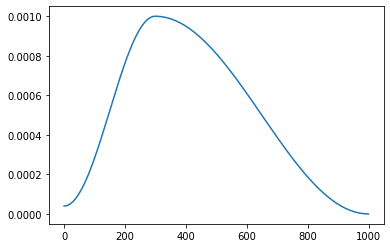

In [15]:
plt.plot(np.arange(len(lrs)), lrs)